In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
# new_path = '/capstor/scratch/cscs/ajayaraj/qtpyt-tests/pentadienyl/production_run'
# os.chdir(new_path)

## Leads self-energy

In [ ]:
# leads_se = np.load("./output/lowdin/self_energy.npy", allow_pickle=True)
# energies = np.arange(-1, 1, 0.01)
# se = np.array([leads_se[0].retarded(e) for e in energies])

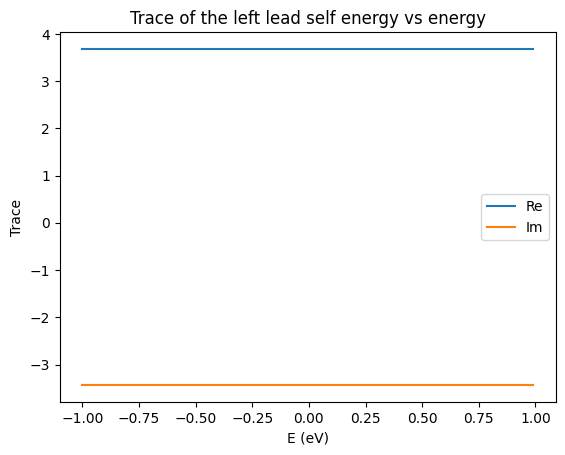

In [34]:
se_trace = np.trace(se[:,0:9,0:9], axis1=1, axis2=2)
plt.plot(energies,se_trace.real,label="Re")
plt.plot(energies,se_trace.imag,label="Im")
plt.legend()
plt.xlabel("E (eV)")
plt.ylabel("Trace")
plt.title("Trace of the left lead self energy vs energy")
plt.show()

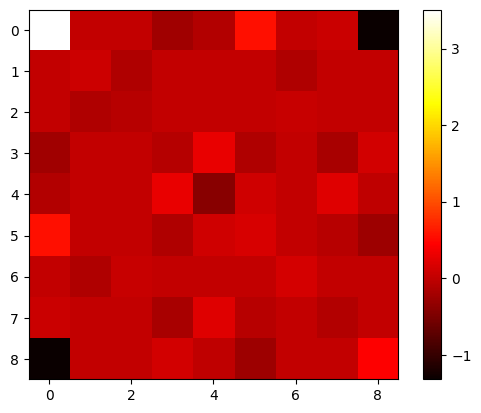

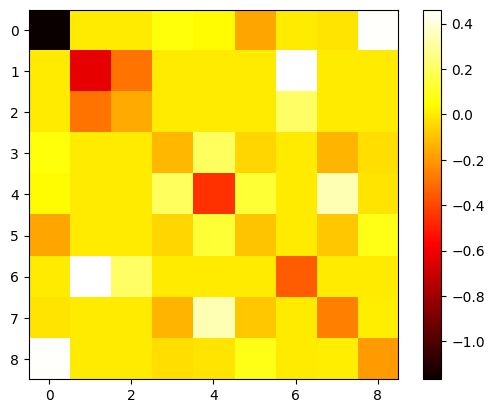

In [35]:
plt.imshow(se[10,0:9,0:9].real, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()
plt.imshow(se[10,0:9,0:9].imag, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


## DFT

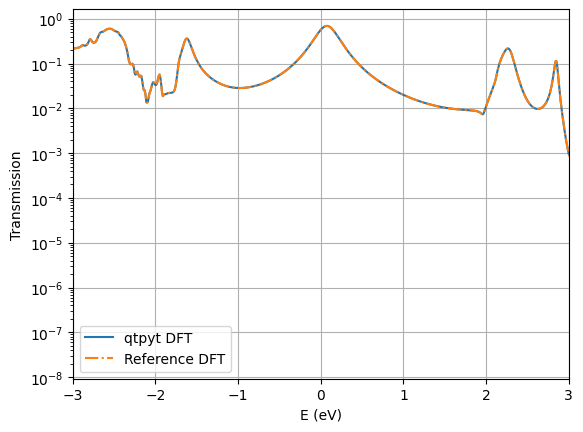

In [2]:
Angelo_dft = np.load("../Angelo_data/dft/Te_landauer.npy")
Angelo_dft = Angelo_dft[0]
E_dft,T_dft = np.load("./output/lowdin/dft/ET.npy")
E_ref, T_ref = np.load("../reference/ET_dft.npy")
plt.plot(E_dft, T_dft, label='qtpyt DFT')
plt.plot(E_ref, T_ref,'-.',label='Reference DFT')
# plt.plot(Angelo_dft[:,0],Angelo_dft[:,1],label="Angelo")
plt.yscale('log')
plt.legend()
plt.xlabel("E (eV)")
plt.ylabel("Transmission")
plt.xlim(-3,3)
plt.grid(True)
# plt.ylim(bottom=1e-6)

## DMFT

(7, 20000)
(20000,)


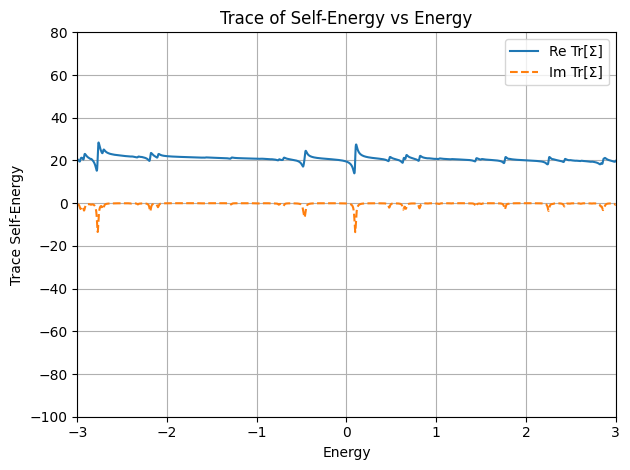

In [3]:
angelo_dmft_se = np.load("../Angelo_data/dmft/self.npy")
angelo_dmft_se = angelo_dmft_se[0]
angelo_energy = np.load("../Angelo_data/dmft/energies.npy")
print(angelo_dmft_se.shape)
print(angelo_energy.shape)

trace_self_energy = np.sum(angelo_dmft_se, axis=0)  # shape (20000,)

# Plot trace vs energy
plt.plot(angelo_energy, trace_self_energy.real, label='Re Tr[Σ]')
plt.plot(angelo_energy, trace_self_energy.imag, label='Im Tr[Σ]', linestyle='--')
plt.xlabel("Energy")
plt.ylabel("Trace Self-Energy")
plt.title("Trace of Self-Energy vs Energy")
plt.xlim(-3, 3.0)
plt.ylim(-100,80)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

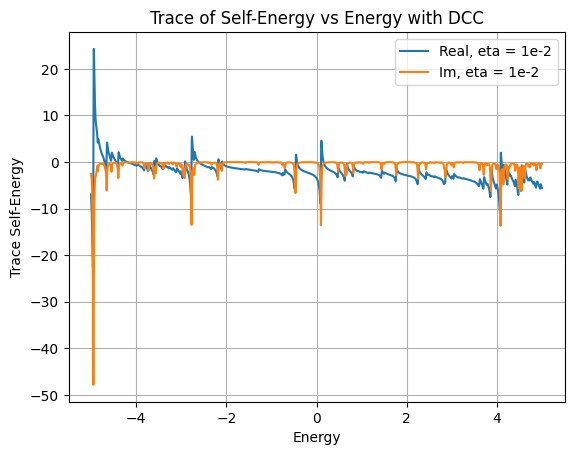

Filtered energies shape: (12000,)
trace_se shape: (12000,)


In [4]:
angelo_dmft_se = np.load("../Angelo_data/dmft/self.npy")
angelo_dmft_se = angelo_dmft_se[0]
V = np.loadtxt("output/lowdin/U_matrix.txt")
data_folder = "./output/lowdin"
occupancy_goal = np.load(f"{data_folder}/occupancies.npy")
double_counting = (V.diagonal() * (occupancy_goal - 0.5))
angelo_dmft_se = angelo_dmft_se - double_counting[:, np.newaxis]
trace_se = np.sum(angelo_dmft_se,axis=0)
plt.plot(angelo_energy,trace_se.real,label="Real, eta = 1e-2")
plt.plot(angelo_energy,trace_se.imag,label="Im, eta = 1e-2")
plt.xlabel("Energy")
plt.ylabel("Trace Self-Energy")
plt.title("Trace of Self-Energy vs Energy with DCC")
# plt.xlim(-1,1)
# plt.ylim(-10, 10)
plt.grid(True)
plt.legend()
plt.show()

mask = (angelo_energy >= -3) & (angelo_energy <= 3)
filtered_energies = angelo_energy[mask]
filtered_self_energy = angelo_dmft_se[:, mask]
filtered_trace_se = trace_se[mask]
subsampled_self_energy_T = filtered_self_energy.T
self_energy_matrices = np.array([np.diag(vec) for vec in subsampled_self_energy_T])

print("Filtered energies shape:", filtered_energies.shape)
print("trace_se shape:", filtered_trace_se.shape)
# np.save("./output/lowdin/dmft/non_spin/energies.npy", filtered_energies)
# np.save("./output/lowdin/dmft/non_spin/dcc_diag.npy", double_counting)
# np.save("./output/lowdin/dmft/non_spin/self_energy.npy", self_energy_matrices)
np.save("./output/lowdin/dmft/non_spin/trace_self_energy_with_dcc.npy", (filtered_energies,filtered_trace_se))

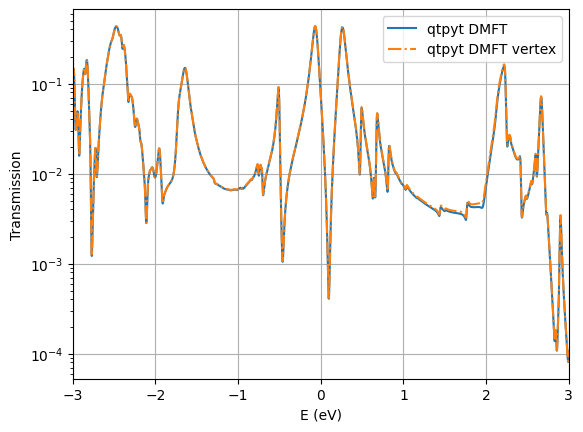

In [113]:
E, T_dmft = np.load("./output/lowdin/dmft/non_spin/ET.npy")
_, T_vertex_dmft = np.load("./output/lowdin/dmft/non_spin/ET_vertex.npy")
plt.plot(E, T_dmft, label='qtpyt DMFT')
plt.plot(E, T_vertex_dmft,'-.' ,label='qtpyt DMFT vertex')
plt.yscale('log')
plt.xlabel("E (eV)")
plt.ylabel("Transmission")
plt.xlim(-3, 3)
plt.grid(True)
# plt.ylim(bottom=1e-6)
plt.legend()
plt.show()

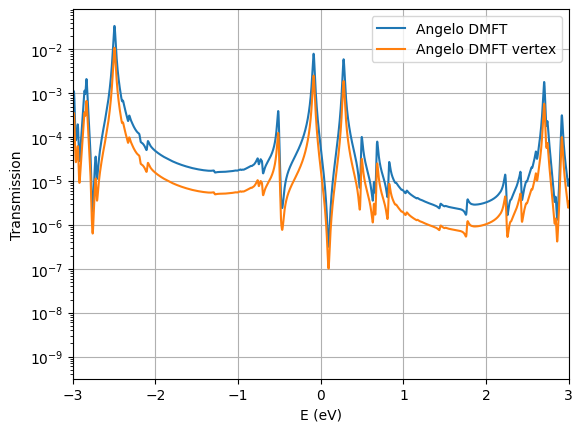

In [112]:
Angelo_dmft = np.load("../Angelo_data/dmft/Te_landauer.npy")
Angelo_dmft_vertex = np.load("../Angelo_data/dmft/Te_landauer_vertex.npy")
Angelo_dmft = Angelo_dmft[0]
Angelo_dmft_vertex = Angelo_dmft_vertex[0]
plt.plot(Angelo_dmft[:,0], Angelo_dmft[:,1], label="Angelo DMFT")
plt.plot(Angelo_dmft_vertex[:,0], Angelo_dmft_vertex[:,1], label="Angelo DMFT vertex")
plt.grid(True)
plt.xlabel("E (eV)")
plt.ylabel("Transmission")
plt.yscale('log')
plt.xlim(-3, 3)
# plt.ylim(bottom=1e-6)
plt.legend()
plt.show()


## Spin DMFT

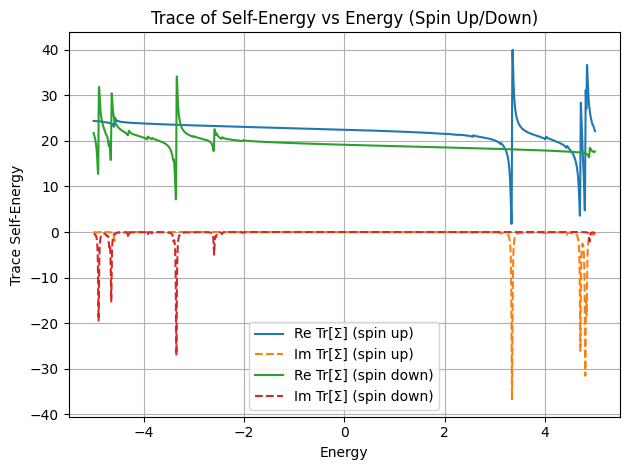

In [6]:
angelo_dmft_se = np.load("../Angelo_data/dmft-spin/self.npy")
spin_up_trace = np.sum(angelo_dmft_se[0], axis=0)
spin_down_trace = np.sum(angelo_dmft_se[1], axis=0)

plt.plot(angelo_energy, spin_up_trace.real, label='Re Tr[Σ] (spin up)')
plt.plot(angelo_energy, spin_up_trace.imag, '--', label='Im Tr[Σ] (spin up)')
plt.plot(angelo_energy, spin_down_trace.real, label='Re Tr[Σ] (spin down)')
plt.plot(angelo_energy, spin_down_trace.imag, '--', label='Im Tr[Σ] (spin down)')
plt.xlabel("Energy")
plt.ylabel("Trace Self-Energy")
plt.title("Trace of Self-Energy vs Energy (Spin Up/Down)")
# plt.xlim(-3, 3)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


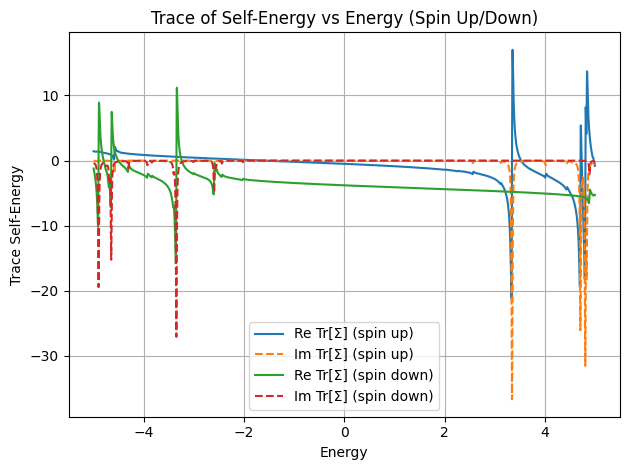

In [5]:
occupancy_goal_up = occupancy_goal
occupancy_goal_down = occupancy_goal
double_counting_up = (V.diagonal() * (occupancy_goal_up - 0.5))
double_counting_down = (V.diagonal() * (occupancy_goal_down - 0.5))
angelo_dmft_se = np.load("../Angelo_data/dmft-spin/self.npy")

angelo_dmft_se_up = angelo_dmft_se[0]
angelo_dmft_se_down = angelo_dmft_se[1]

angelo_dmft_se_up = angelo_dmft_se_up - double_counting_up[:, np.newaxis]
angelo_dmft_se_down = angelo_dmft_se_down - double_counting_down[:, np.newaxis]
spin_up_trace = np.sum(angelo_dmft_se_up, axis=0)
spin_down_trace = np.sum(angelo_dmft_se_down, axis=0)

plt.plot(angelo_energy, spin_up_trace.real, label='Re Tr[Σ] (spin up)')
plt.plot(angelo_energy, spin_up_trace.imag, '--', label='Im Tr[Σ] (spin up)')
plt.plot(angelo_energy, spin_down_trace.real, label='Re Tr[Σ] (spin down)')
plt.plot(angelo_energy, spin_down_trace.imag, '--', label='Im Tr[Σ] (spin down)')
plt.xlabel("Energy")
plt.ylabel("Trace Self-Energy")
plt.title("Trace of Self-Energy vs Energy (Spin Up/Down)")
# plt.xlim(-3, 3)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

mask = (angelo_energy >= -3) & (angelo_energy <= 3)
filtered_self_energy_up = angelo_dmft_se_up[:, mask]
filtered_self_energy_down = angelo_dmft_se_down[:, mask]
filtered_spin_up_trace = spin_up_trace[mask]
filtered_spin_down_trace = spin_down_trace[mask]
subsampled_self_energy_T_up = filtered_self_energy_up.T
subsampled_self_energy_T_down = filtered_self_energy_down.T
self_energy_matrices_up = np.array([np.diag(vec) for vec in subsampled_self_energy_T_up])
self_energy_matrices_down = np.array([np.diag(vec) for vec in subsampled_self_energy_T_down])

# np.save("./output/lowdin/dmft/spin/self_energy_up.npy", self_energy_matrices_up)
# np.save("./output/lowdin/dmft/spin/self_energy_dw.npy", self_energy_matrices_down)
np.save("./output/lowdin/dmft/spin/trace_self_energy_with_dcc_up.npy", (filtered_energies,filtered_spin_up_trace))
np.save("./output/lowdin/dmft/spin/trace_self_energy_with_dcc_dw.npy", (filtered_energies,filtered_spin_down_trace))


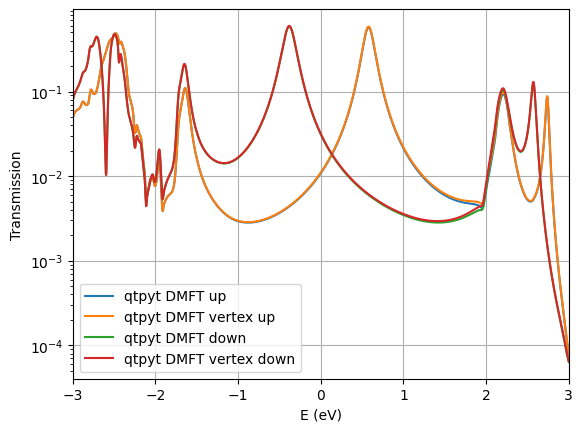

In [ ]:
E, T_up = np.load("./output/lowdin/dmft/spin/ET_up.npy")
_, T_vertex_up = np.load("./output/lowdin/dmft/spin/ET_vertex_up.npy")
_, T_down = np.load("./output/lowdin/dmft/spin/ET_dw.npy")
_, T_vertex_down = np.load("./output/lowdin/dmft/spin/ET_vertex_dw.npy")
plt.plot(E, T_up, label='qtpyt DMFT up')
plt.plot(E, T_vertex_up, label='qtpyt DMFT vertex up')
plt.plot(E, T_down, label='qtpyt DMFT down')
plt.plot(E, T_vertex_down, label='qtpyt DMFT vertex down')
plt.yscale('log')
plt.xlabel("E (eV)")
plt.ylabel("Transmission")
plt.xlim(-3, 3)
plt.grid(True)
# plt.ylim(bottom=1e-6)
plt.legend()
plt.show()

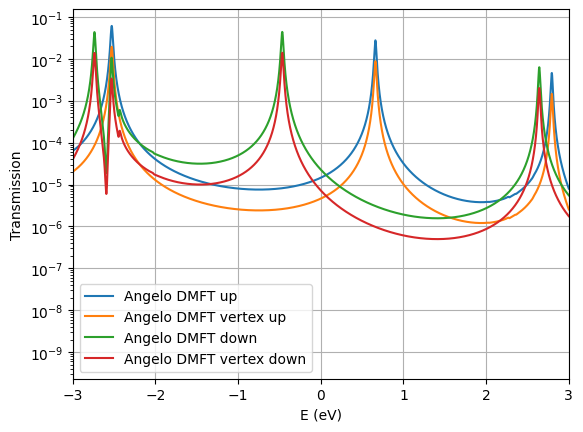

In [114]:
Angelo_dmft = np.load("../Angelo_data/dmft-spin/Te_landauer.npy")
Angelo_dmft_vertex = np.load("../Angelo_data/dmft-spin/Te_landauer_vertex.npy")
plt.plot(Angelo_dmft[0,:,0], Angelo_dmft[0,:,1], label="Angelo DMFT up")
plt.plot(Angelo_dmft_vertex[0,:,0], Angelo_dmft_vertex[0,:,1], label="Angelo DMFT vertex up")
plt.plot(Angelo_dmft[1,:,0], Angelo_dmft[1,:,1], label="Angelo DMFT down")
plt.plot(Angelo_dmft_vertex[1,:,0], Angelo_dmft_vertex[1,:,1], label="Angelo DMFT vertex down")
plt.grid(True)
plt.xlabel("E (eV)")
plt.ylabel("Transmission")
plt.yscale('log')
plt.xlim(-3, 3)
# plt.ylim(bottom=1e-6)
plt.legend()
plt.show()

## Exact diagonalization

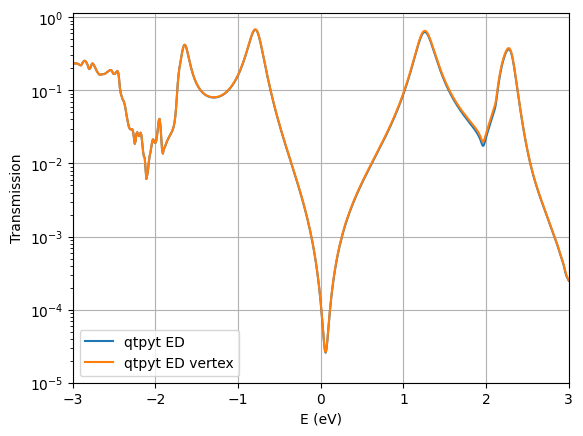

In [98]:
E, T_ed = np.load("./output/lowdin/ed/ET.npy")
_, T_vertex = np.load("./output/lowdin/ed/ET_vertex.npy")
E_ref, T_ref = np.load("../reference/ET_ed.npy")
plt.plot(E, T_ed, label='qtpyt ED')
plt.plot(E, T_vertex, label='qtpyt ED vertex')
# plt.plot(E_ref, T_ref, label='Reference ED')
# plt.plot(E_dft, T_dft, label='qtpyt DFT')
plt.yscale('log')
plt.xlabel("E (eV)")
plt.ylabel("Transmission")
plt.xlim(-3, 3)
plt.grid(True)
plt.ylim(bottom=1e-5)
plt.legend()
plt.show()

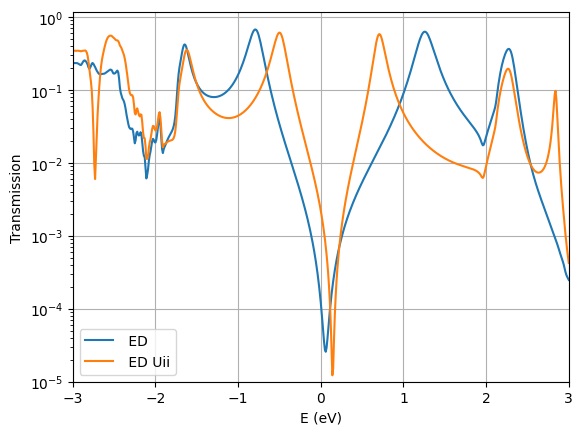

In [2]:
E, T_ed = np.load("./output/lowdin/ed/ET.npy")
_, T_Uii = np.load("./output/lowdin/ed/ET_Uii.npy")
plt.plot(E, T_ed, label=' ED')
plt.plot(E, T_Uii, label=' ED Uii')
plt.yscale('log')
plt.xlabel("E (eV)")
plt.ylabel("Transmission")
plt.xlim(-3, 3)
plt.grid(True)
plt.ylim(bottom=1e-5)
plt.legend()
plt.show()

### Non block tridiagonal vs BTM

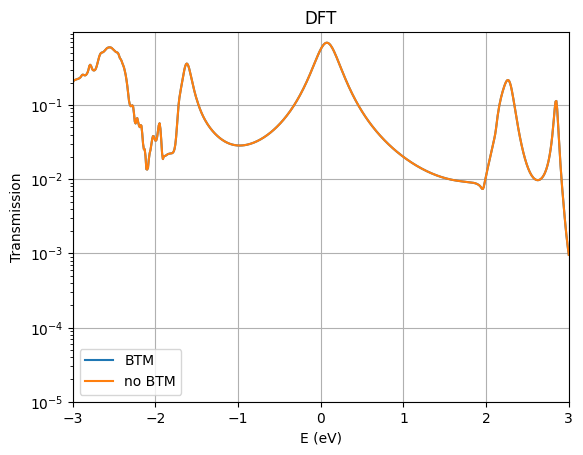

In [11]:
E, T_btm = np.load("./output/lowdin/dft/ET.npy")
# E2, T_non_btm = np.load("./output/lowdin/dmft/vertex_tests/ET_dft.npy")
E2, T_non_btm = np.load("./output/lowdin/ed/vertex_tests/ET_dft.npy")
plt.plot(E, T_btm, label='BTM')
plt.plot(E2, T_non_btm, label='no BTM')
plt.yscale('log')
plt.xlabel("E (eV)")
plt.ylabel("Transmission")
plt.xlim(-3, 3)
plt.grid(True)
plt.title("DFT")
plt.ylim(bottom=1e-5)
plt.legend()
plt.show()

In [5]:
E, T_btm = np.load("./output/lowdin/dmft/non_spin/ET.npy")
_, T_non_btm = np.load("./output/lowdin/dmft/vertex_tests/ET_non_btm_no_correction.npy")
plt.plot(E, T_btm, label='BTM')
plt.plot(E, T_non_btm, label='no BTM')
plt.yscale('log')
plt.xlabel("E (eV)")
plt.ylabel("Transmission")
plt.title("DMFT")
plt.xlim(-3, 3)
plt.grid(True)
plt.ylim(bottom=1e-5)
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './output/lowdin/dmft/vertex_tests/ET_non_btm_no_correction.npy'

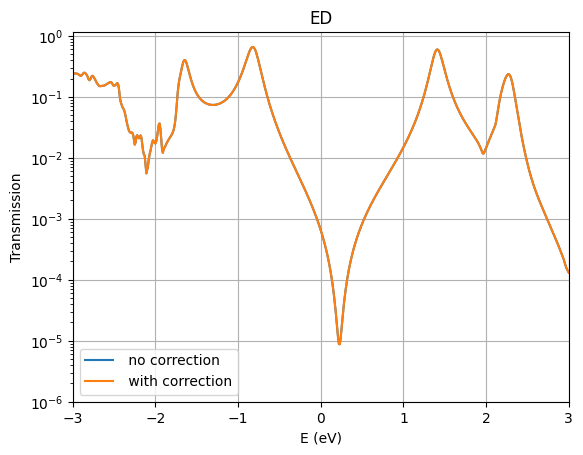

In [4]:
E, T_btm = np.load("./output/lowdin/ed/vertex_tests/ET_btm_no_correction.npy")
_, T_non_btm = np.load("./output/lowdin/ed/vertex_tests/ET_non_btm_no_correction.npy")
_, T_non_btm_correction = np.load("./output/lowdin/ed/vertex_tests/ET_non_btm_with_correction.npy")
# plt.plot(E, T_btm, label='BTM no correction')
plt.plot(E, T_non_btm, label=' no correction')
plt.plot(E, T_non_btm_correction, label=' with correction')
plt.yscale('log')
plt.xlabel("E (eV)")
plt.ylabel("Transmission")
plt.title("ED")
plt.xlim(-3, 3)
plt.grid(True)
plt.ylim(bottom=1e-6)
plt.legend()
plt.show()

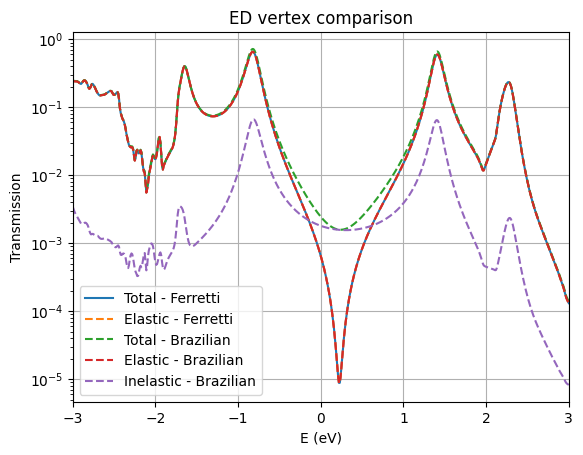

In [12]:
E,T_total,T_elastic,T_inelastic = np.load("./output/lowdin/ed/vertex_tests/transmission_data_ferretti.npy")
E_b,T_total_b,T_elastic_b,T_inelastic_b = np.load("./output/lowdin/ed/vertex_tests/transmission_data_brazilian.npy")
plt.plot(E, T_total, label='Total - Ferretti')
plt.plot(E, T_elastic, '--', label='Elastic - Ferretti')
# plt.plot(E, T_inelastic, label='Inelastic - Ferretti')
plt.plot(E_b, T_total_b, '--', label='Total - Brazilian')
plt.plot(E_b, T_elastic_b, '--', label='Elastic - Brazilian')
plt.plot(E_b, T_inelastic_b, '--', label='Inelastic - Brazilian')
plt.yscale('log')
plt.xlabel("E (eV)")
plt.ylabel("Transmission")
plt.title("ED vertex comparison")
plt.xlim(-3,3)
plt.grid(True)
plt.legend()

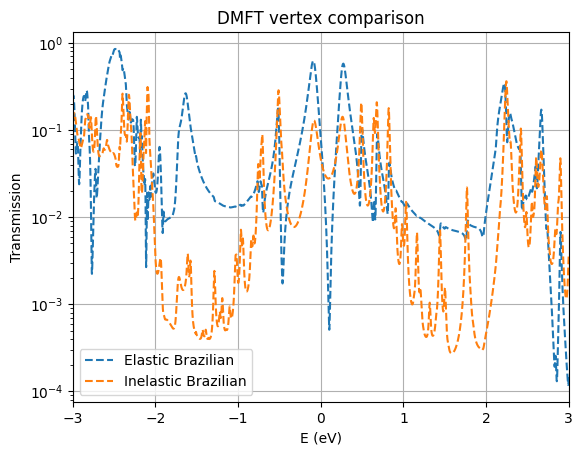

In [74]:
E_b,T_total_b,T_elastic_b,T_inelastic_b = np.load("./output/lowdin/dmft/non_spin/vertex_tests/transmission_data_brazilian.npy")
# plt.plot(E, T_total, label='Total Ferretti')
# plt.plot(E, T_elastic, '--' label='Elastic Ferretti')
# plt.plot(E, T_inelastic, label='Inelastic Ferretti')
# plt.plot(E_b, T_total_b, '--', label='Total Brazilian')
plt.plot(E_b, T_elastic_b, '--', label='Elastic Brazilian')
plt.plot(E_b, T_inelastic_b, '--', label='Inelastic Brazilian')
plt.yscale('log')
plt.xlabel("E (eV)")
plt.ylabel("Transmission")
plt.title("DMFT vertex comparison")
plt.xlim(-3,3)
plt.grid(True)
plt.legend()

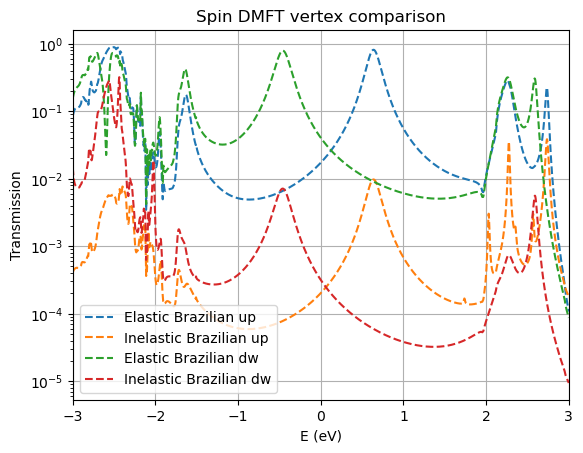

In [16]:
E_b,T_total_b,T_elastic_b,T_inelastic_b = np.load("./output/lowdin/dmft/spin/vertex_tests/transmission_data_brazilian_up.npy")
_,T_total_b_dw,T_elastic_b_dw,T_inelastic_b_dw = np.load("./output/lowdin/dmft/spin/vertex_tests/transmission_data_brazilian_dw.npy")
# plt.plot(E, T_total, label='Total Ferretti')
# plt.plot(E, T_elastic, '--' label='Elastic Ferretti')
# plt.plot(E, T_inelastic, label='Inelastic Ferretti')
# plt.plot(E_b, T_total_b, '--', label='Total Brazilian')
plt.plot(E_b, T_elastic_b, '--', label='Elastic Brazilian up')
plt.plot(E_b, T_inelastic_b, '--', label='Inelastic Brazilian up')
plt.plot(E_b, T_elastic_b_dw, '--', label='Elastic Brazilian dw')
plt.plot(E_b, T_inelastic_b_dw, '--', label='Inelastic Brazilian dw')
plt.yscale('log')
plt.xlabel("E (eV)")
plt.ylabel("Transmission")
plt.title("Spin DMFT vertex comparison")
plt.xlim(-3,3)
plt.grid(True)
plt.legend()

In [9]:
# === Load saved data ===
data_folder = "./output/lowdin/ed/vertex_tests"
gammaL_data = np.load(f"{data_folder}/gamma_L_vs_energy.npz", allow_pickle=True)
gammaR_data = np.load(f"{data_folder}/gamma_R_vs_energy.npz", allow_pickle=True)
delta_data = np.load(f"{data_folder}/delta_vs_energy.npz", allow_pickle=True)

energies = gammaL_data["energies"]
gamma_L = gammaL_data["gamma_L"]
gamma_R = gammaR_data["gamma_R"]
delta = delta_data["delta"]


In [10]:
from matplotlib.colors import ListedColormap

maroon_cmap = plt.get_cmap('Reds')
colors = maroon_cmap(np.linspace(0.3, 1, 256))
colors[0] = [1, 1, 1, 1]
custom_cmap = ListedColormap(colors)

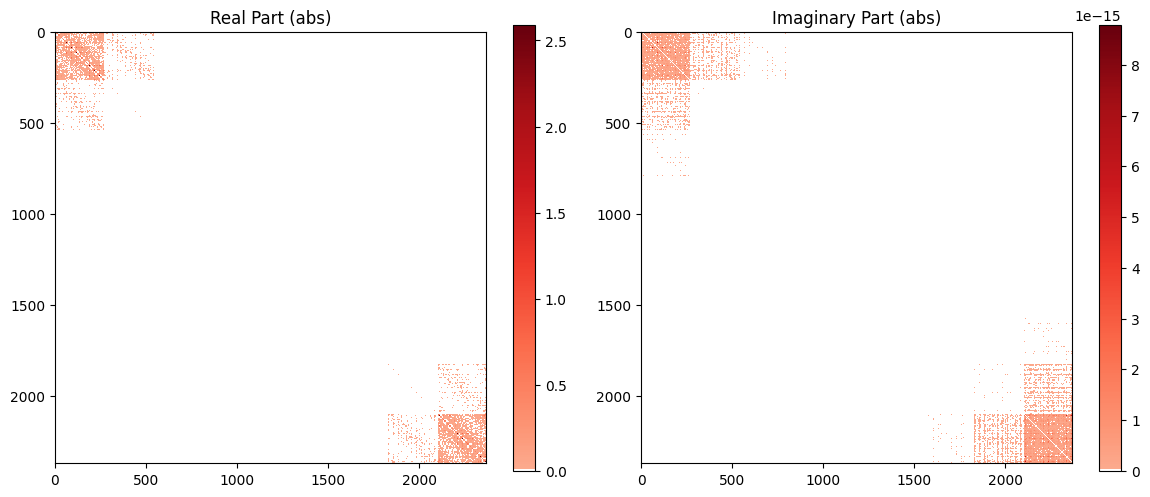

In [ ]:
gamma_sum = gamma_L[0] + gamma_R[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot real part
im1 = ax1.imshow(abs(gamma_sum.real), cmap=custom_cmap, interpolation='nearest', vmin=0)
ax1.set_title('Real Part (abs)')
fig.colorbar(im1, ax=ax1)

# Plot imaginary part
im2 = ax2.imshow(abs(gamma_sum.imag), cmap=custom_cmap, interpolation='nearest', vmin=0)
ax2.set_title('Imaginary Part (abs)')
fig.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()

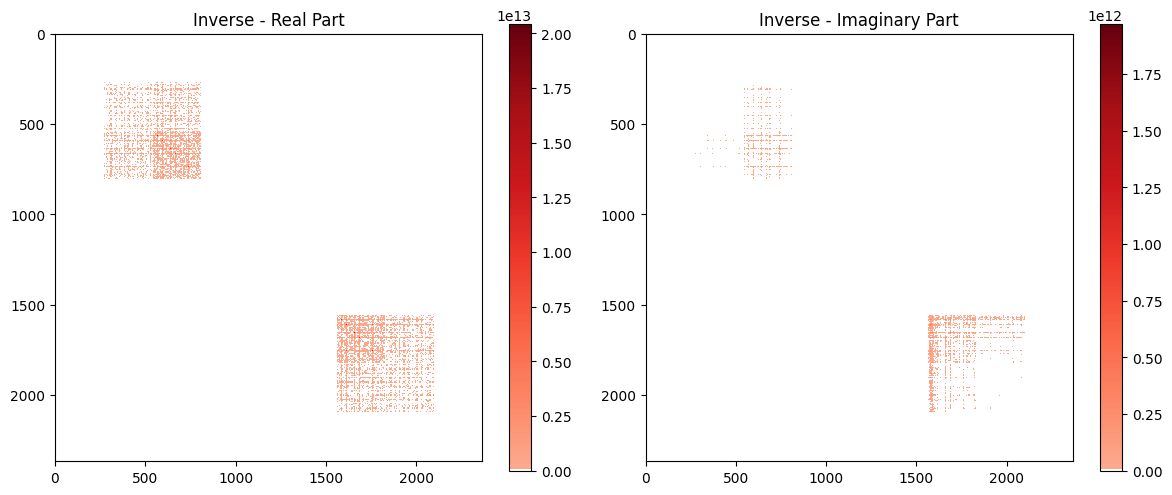

In [21]:
try:
    gamma_inv = np.linalg.pinv(gamma_sum)
except np.linalg.LinAlgError:
    raise ValueError("Matrix is singular and cannot be inverted.")

# Step 3: Plot real and imaginary parts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Real part
im1 = ax1.imshow(np.abs(gamma_inv.real), cmap=custom_cmap, interpolation='nearest')
ax1.set_title("Inverse - Real Part")
fig.colorbar(im1, ax=ax1)

# Imaginary part
im2 = ax2.imshow(np.abs(gamma_inv.imag), cmap=custom_cmap, interpolation='nearest')
ax2.set_title("Inverse - Imaginary Part")
fig.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()

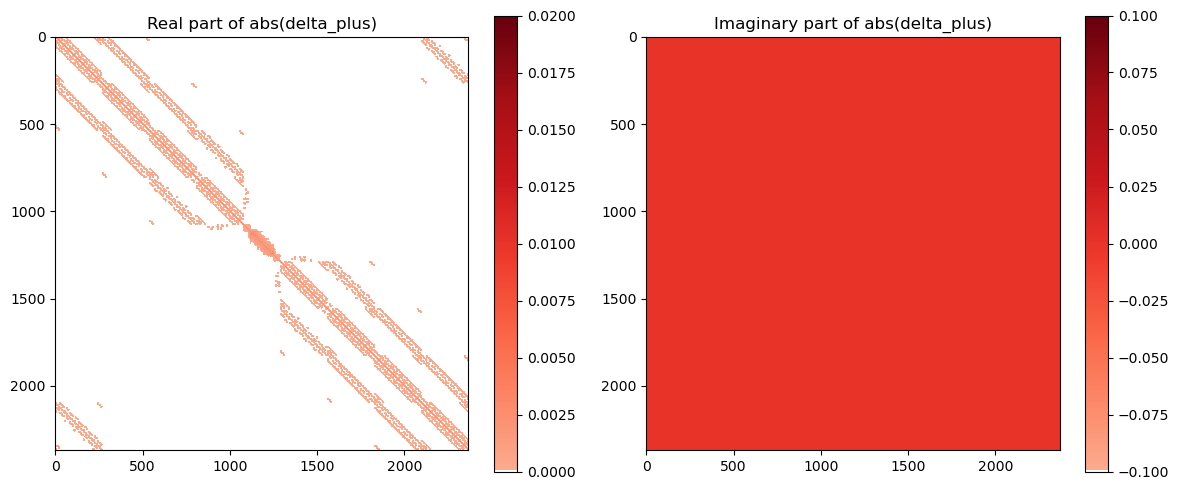

In [7]:
data_folder = "./output/lowdin"
H_subdiagonalized, S_subdiagonalized = map(
    lambda m: m.astype(complex),
    np.load(f"{data_folder}/hs_los_lowdin.npy"),
)
S_subdiagonalized = S_subdiagonalized[0]
eta = 1e-2
delta_plus = 2 * eta * S_subdiagonalized

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

im0 = ax[0].imshow(abs(delta_plus.real), cmap=custom_cmap)
ax[0].set_title("Real part of abs(delta_plus)")
fig.colorbar(im0, ax=ax[0])

im1 = ax[1].imshow(abs(delta_plus.imag), cmap=custom_cmap)
ax[1].set_title("Imaginary part of abs(delta_plus)")
fig.colorbar(im1, ax=ax[1])

plt.tight_layout()
plt.show()


In [23]:
delta_plus_alternate = eta * np.eye(S_subdiagonalized.shape[0])

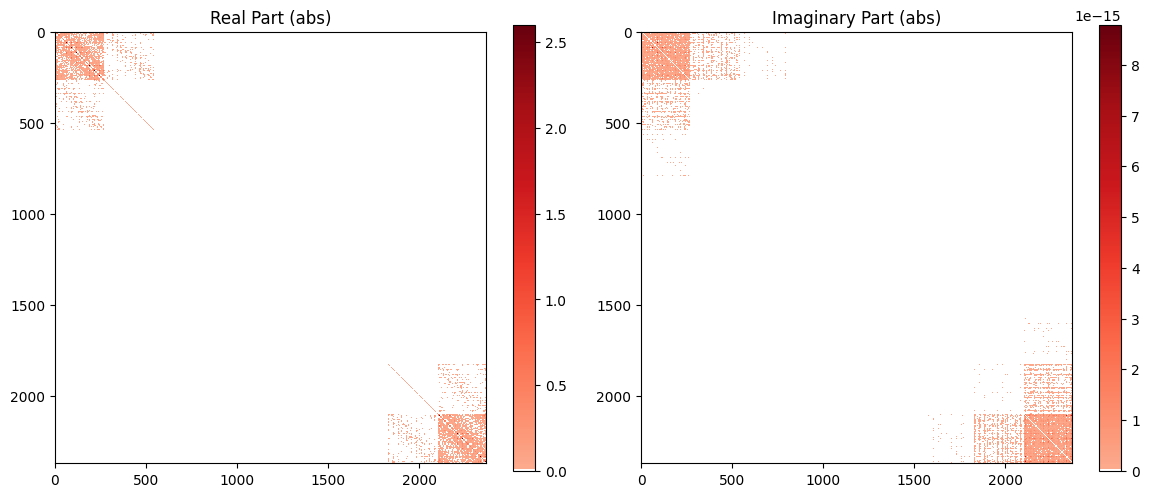

In [24]:
gamma_broadened = gamma_sum + delta_plus_alternate
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Plot real part
im1 = ax1.imshow(abs(gamma_broadened.real), cmap=custom_cmap, interpolation='nearest', vmin=0)
ax1.set_title('Real Part (abs)')
fig.colorbar(im1, ax=ax1)
# Plot imaginary part
im2 = ax2.imshow(abs(gamma_broadened.imag), cmap=custom_cmap, interpolation='nearest', vmin=0)
ax2.set_title('Imaginary Part (abs)')
fig.colorbar(im2, ax=ax2)
plt.tight_layout()
plt.show()


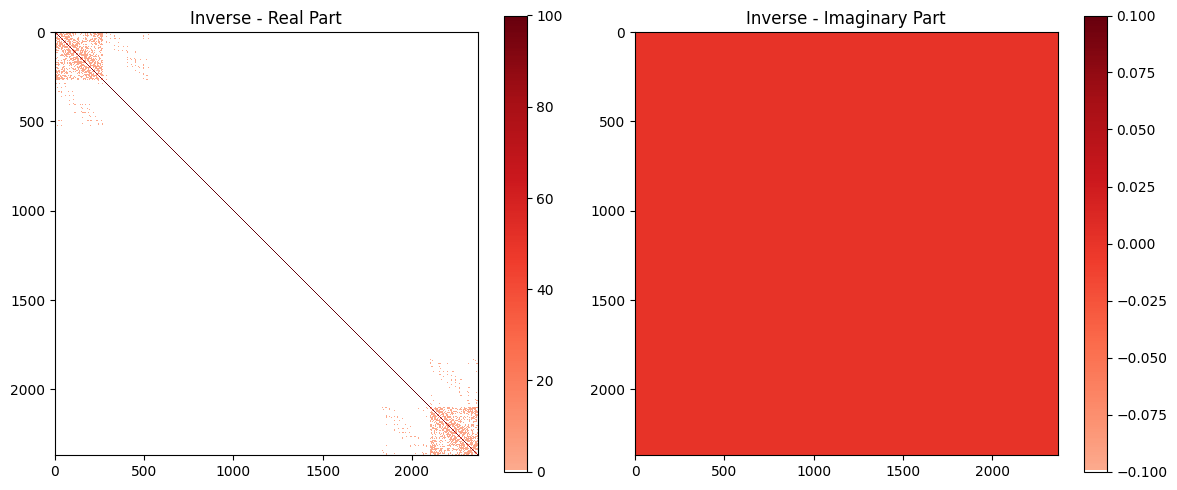

In [25]:
gamma_broadened_inv = np.linalg.inv(gamma_broadened)
# Step 3: Plot real and imaginary parts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Real part
im1 = ax1.imshow(np.abs(gamma_broadened_inv).real, cmap=custom_cmap, interpolation='nearest', vmin=0)
ax1.set_title("Inverse - Real Part")
fig.colorbar(im1, ax=ax1)
# Imaginary part
im2 = ax2.imshow(np.abs(gamma_broadened_inv).imag, cmap=custom_cmap, interpolation='nearest', vmin=0)
ax2.set_title("Inverse - Imaginary Part")
fig.colorbar(im2, ax=ax2)
plt.tight_layout()
plt.show()

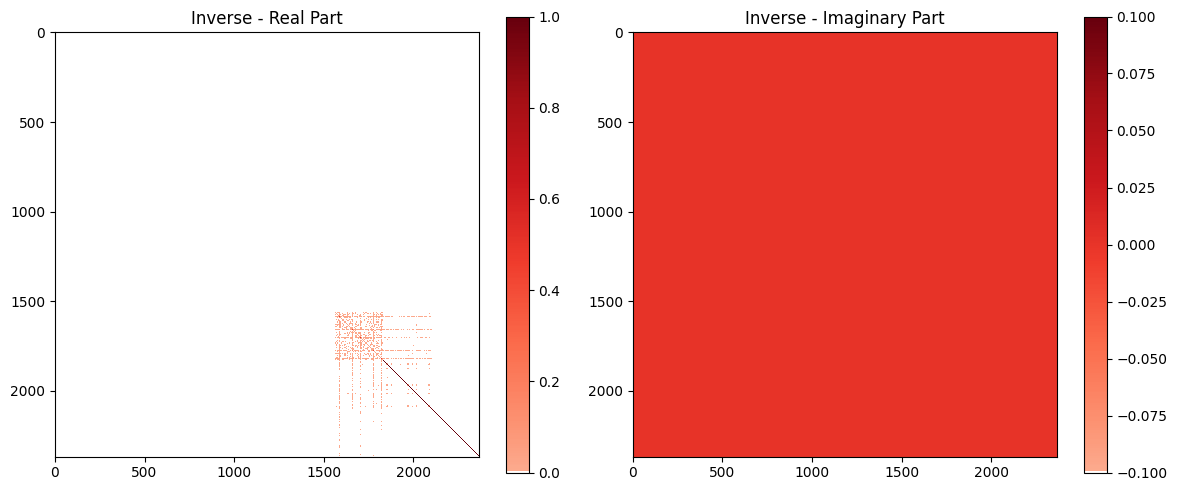

In [ ]:
product = gamma_R[0] @ gamma_inv
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Real part
im1 = ax1.imshow(np.abs(product).real, cmap=custom_cmap, interpolation='nearest', vmin=0)
ax1.set_title("Inverse - Real Part")
fig.colorbar(im1, ax=ax1)
# Imaginary part
im2 = ax2.imshow(np.abs(product).imag, cmap=custom_cmap, interpolation='nearest', vmin=0)
ax2.set_title("Inverse - Imaginary Part")
fig.colorbar(im2, ax=ax2)
plt.tight_layout()
plt.show()

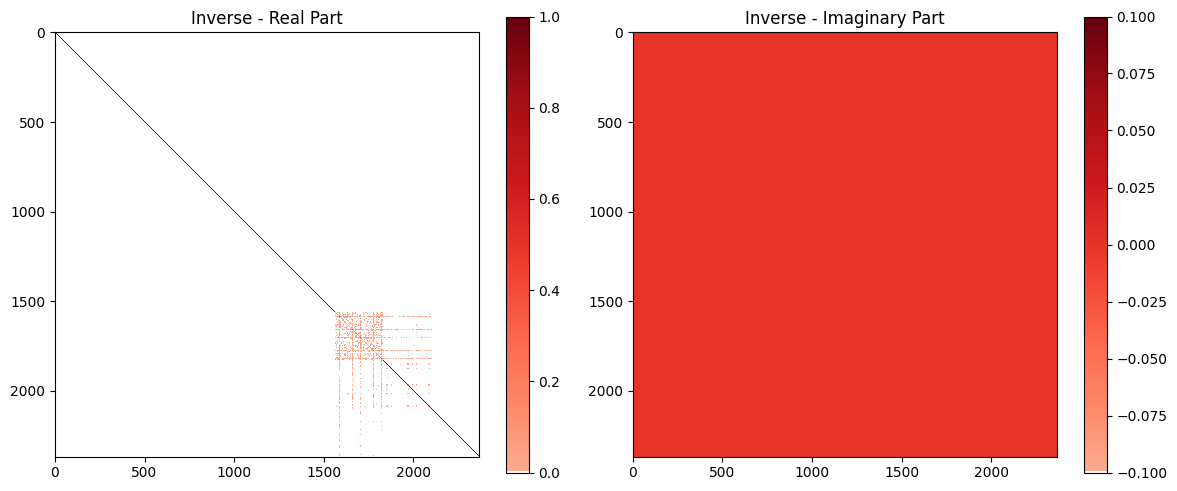

In [28]:
correction =  np.eye(gamma_inv.shape[0])
correction[1558:, 1558:] = 0  # Specific to the system
product_corrected = product + correction
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
im1 = ax1.imshow(np.abs(product_corrected).real, cmap=custom_cmap, interpolation='nearest', vmin=0)
ax1.set_title("Inverse - Real Part")
fig.colorbar(im1, ax=ax1)
# Imaginary part
im2 = ax2.imshow(np.abs(product_corrected).imag, cmap=custom_cmap, interpolation='nearest', vmin=0)
ax2.set_title("Inverse - Imaginary Part")
fig.colorbar(im2, ax=ax2)
plt.tight_layout()
plt.show()